<a href="https://colab.research.google.com/github/plaban1981/MachieHack/blob/master/CrimePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import ML Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Load Data

In [0]:
dataset=pd.read_csv('data.csv')


In [0]:
data=pd.read_csv('data.csv')


In [84]:
dataset.head()


,timestamp,act379,act13,act279,act323,act363,act302,latitude,longitude
0,28-02-2018 21:00,1,0,0,0,0,0,22.737260,75.875987
1,28-02-2018 21:15,1,0,0,0,0,0,22.720992,75.876083
2,28-02-2018 10:15,0,0,1,0,0,0,22.736676,75.883168
3,28-02-2018 10:15,0,0,1,0,0,0,22.746527,75.887139
4,28-02-2018 10:30,0,0,1,0,0,0,22.769531,75.888772


In [53]:
dataset.tail()

,timestamp,act379,act13,act279,act323,act363,act302,latitude,longitude
2085,7/3/2018 3:50,0,0,0,1,0,0,22.712970,75.823580
2086,7/3/2018 21:10,0,0,0,1,0,0,22.693481,75.821483
2087,7/3/2018 12:10,0,0,1,0,0,0,22.531931,75.769126
2088,7/3/2018 10:35,0,0,1,0,0,0,22.719569,75.857726
2089,7/3/2018 23:45,0,0,1,0,0,0,22.686437,76.032055


In [54]:
data.tail()

,timestamp,act379,act13,act279,act323,act363,act302,latitude,longitude
2085,7/3/2018 3:50,0,0,0,1,0,0,22.712970,75.823580
2086,7/3/2018 21:10,0,0,0,1,0,0,22.693481,75.821483
2087,7/3/2018 12:10,0,0,1,0,0,0,22.531931,75.769126
2088,7/3/2018 10:35,0,0,1,0,0,0,22.719569,75.857726
2089,7/3/2018 23:45,0,0,1,0,0,0,22.686437,76.032055


In [0]:
data['timestamp'] = data['timestamp'].str.replace('/','-')
data['timestamp'] = data['timestamp'].str.replace('.',':')

In [86]:
data.tail()

,timestamp,act379,act13,act279,act323,act363,act302,latitude,longitude
2085,7-3-2018 3:50,0,0,0,1,0,0,22.712970,75.823580
2086,7-3-2018 21:10,0,0,0,1,0,0,22.693481,75.821483
2087,7-3-2018 12:10,0,0,1,0,0,0,22.531931,75.769126
2088,7-3-2018 10:35,0,0,1,0,0,0,22.719569,75.857726
2089,7-3-2018 23:45,0,0,1,0,0,0,22.686437,76.032055


In [73]:
def formatt(values):
   x = values.split("-")
   if len(x[1]) == 2:
     val2 = x[1]
   else:
     val2 = '0'+x[1]
   if len(x[0]) == 2:
     val1 = x[0]
   else:
     val1 = "0" + x[0]
    
   result = val1+"-"+val2+"-"+x[2]
   return result
formatt('7-03-2018 23:45')

'07-03-2018 23:45'

In [0]:
data['timestamp'] = pd.to_datetime(data['timestamp'].str.strip())

In [90]:
data.tail()

,timestamp,act379,act13,act279,act323,act363,act302,latitude,longitude
2085,2018-07-03 03:50:00,0,0,0,1,0,0,22.712970,75.823580
2086,2018-07-03 21:10:00,0,0,0,1,0,0,22.693481,75.821483
2087,2018-07-03 12:10:00,0,0,1,0,0,0,22.531931,75.769126
2088,2018-07-03 10:35:00,0,0,1,0,0,0,22.719569,75.857726
2089,2018-07-03 23:45:00,0,0,1,0,0,0,22.686437,76.032055


In [91]:
dataset.isnull().sum()[dataset.isnull().sum() > 0]

Series([], dtype: int64)

In [92]:
data.isnull().sum()[data.isnull().sum() > 0]

Series([], dtype: int64)

## Data Summary Statistics

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 9 columns):
timestamp    2090 non-null datetime64[ns]
act379       2090 non-null int64
act13        2090 non-null int64
act279       2090 non-null int64
act323       2090 non-null int64
act363       2090 non-null int64
act302       2090 non-null int64
latitude     2090 non-null float64
longitude    2090 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 147.1 KB


In [0]:
data['timestamp'] = pd.to_datetime(data['timestamp'], format = '%d/%m/%Y %H:%M:%S')


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 9 columns):
timestamp    2090 non-null datetime64[ns]
act379       2090 non-null int64
act13        2090 non-null int64
act279       2090 non-null int64
act323       2090 non-null int64
act363       2090 non-null int64
act302       2090 non-null int64
latitude     2090 non-null float64
longitude    2090 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 147.1 KB


In [96]:
data.isnull().sum()[data.isnull().sum() > 0]

Series([], dtype: int64)

##Feature Engineering

In [0]:
# DATE TIME STAMP FUNCTION
column_1 = data['timestamp']

db=pd.DataFrame({"year": column_1.dt.year,
              "month": column_1.dt.month,
              "day": column_1.dt.day,
              "hour": column_1.dt.hour,
              "dayofyear": column_1.dt.dayofyear,
              "week": column_1.dt.week,
              "weekofyear": column_1.dt.weekofyear,
              "dayofweek": column_1.dt.dayofweek,
              "weekday": column_1.dt.weekday,
              "quarter": column_1.dt.quarter,
             })

In [98]:
db.head()

,year,month,day,hour,dayofyear,week,weekofyear,dayofweek,weekday,quarter
0,2018,2,28,21,59,9,9,2,2,1
1,2018,2,28,21,59,9,9,2,2,1
2,2018,2,28,10,59,9,9,2,2,1
3,2018,2,28,10,59,9,9,2,2,1
4,2018,2,28,10,59,9,9,2,2,1


In [0]:
dataset1=dataset.drop('timestamp',axis=1)

In [0]:
data1=pd.concat([db,dataset1],axis=1)

In [101]:
data1.head()

,year,month,day,hour,dayofyear,week,weekofyear,dayofweek,weekday,quarter,act379,act13,act279,act323,act363,act302,latitude,longitude
0,2018,2,28,21,59,9,9,2,2,1,1,0,0,0,0,0,22.737260,75.875987
1,2018,2,28,21,59,9,9,2,2,1,1,0,0,0,0,0,22.720992,75.876083
2,2018,2,28,10,59,9,9,2,2,1,0,0,1,0,0,0,22.736676,75.883168
3,2018,2,28,10,59,9,9,2,2,1,0,0,1,0,0,0,22.746527,75.887139
4,2018,2,28,10,59,9,9,2,2,1,0,0,1,0,0,0,22.769531,75.888772


## Data Analysis

In [102]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 18 columns):
year          2090 non-null int64
month         2090 non-null int64
day           2090 non-null int64
hour          2090 non-null int64
dayofyear     2090 non-null int64
week          2090 non-null int64
weekofyear    2090 non-null int64
dayofweek     2090 non-null int64
weekday       2090 non-null int64
quarter       2090 non-null int64
act379        2090 non-null int64
act13         2090 non-null int64
act279        2090 non-null int64
act323        2090 non-null int64
act363        2090 non-null int64
act302        2090 non-null int64
latitude      2090 non-null float64
longitude     2090 non-null float64
dtypes: float64(2), int64(16)
memory usage: 294.0 KB


##Checking for NULL Values

In [103]:
data1.isnull().sum()[data1.isnull().sum() > 0]

Series([], dtype: int64)

No null values detected in the training sample


## Number of training features and samples

In [104]:
data1.shape

(2090, 18)

In [105]:
data1.head()

,year,month,day,hour,dayofyear,week,weekofyear,dayofweek,weekday,quarter,act379,act13,act279,act323,act363,act302,latitude,longitude
0,2018,2,28,21,59,9,9,2,2,1,1,0,0,0,0,0,22.737260,75.875987
1,2018,2,28,21,59,9,9,2,2,1,1,0,0,0,0,0,22.720992,75.876083
2,2018,2,28,10,59,9,9,2,2,1,0,0,1,0,0,0,22.736676,75.883168
3,2018,2,28,10,59,9,9,2,2,1,0,0,1,0,0,0,22.746527,75.887139
4,2018,2,28,10,59,9,9,2,2,1,0,0,1,0,0,0,22.769531,75.888772


## Data Visualization & Analysis

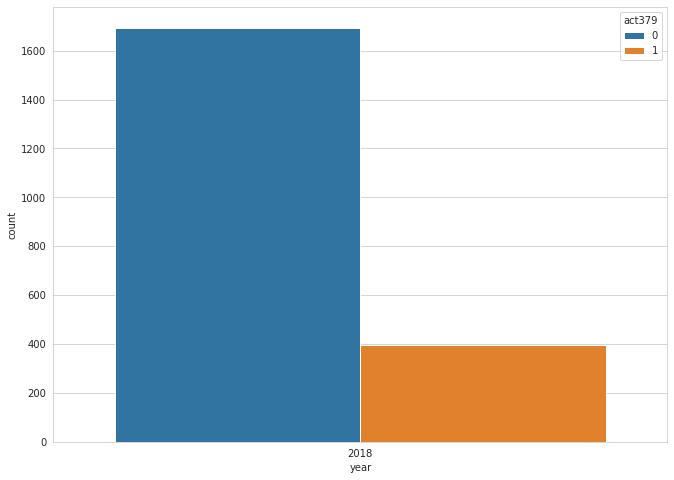

In [113]:
plt.figure(figsize=(11,8))
sns.set_style('whitegrid')
sns.countplot(x='year',data=data1,hue='act379')
plt.savefig('countplot2.png')

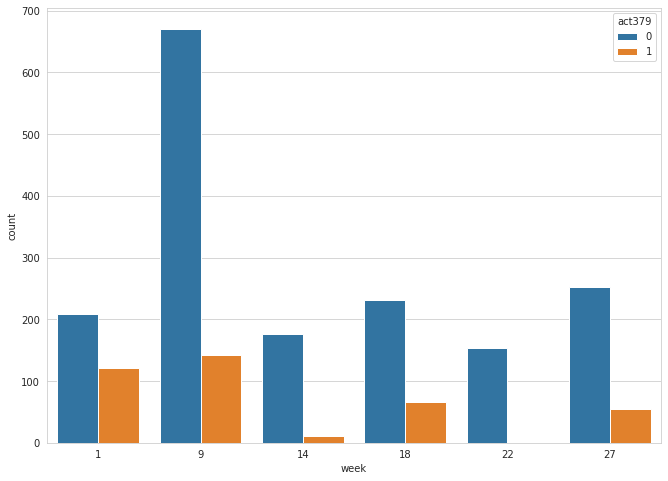

In [112]:
plt.figure(figsize=(11,8))
sns.set_style('whitegrid')
sns.countplot(x='week',data=data1,hue='act379')
plt.savefig('countplot.png')

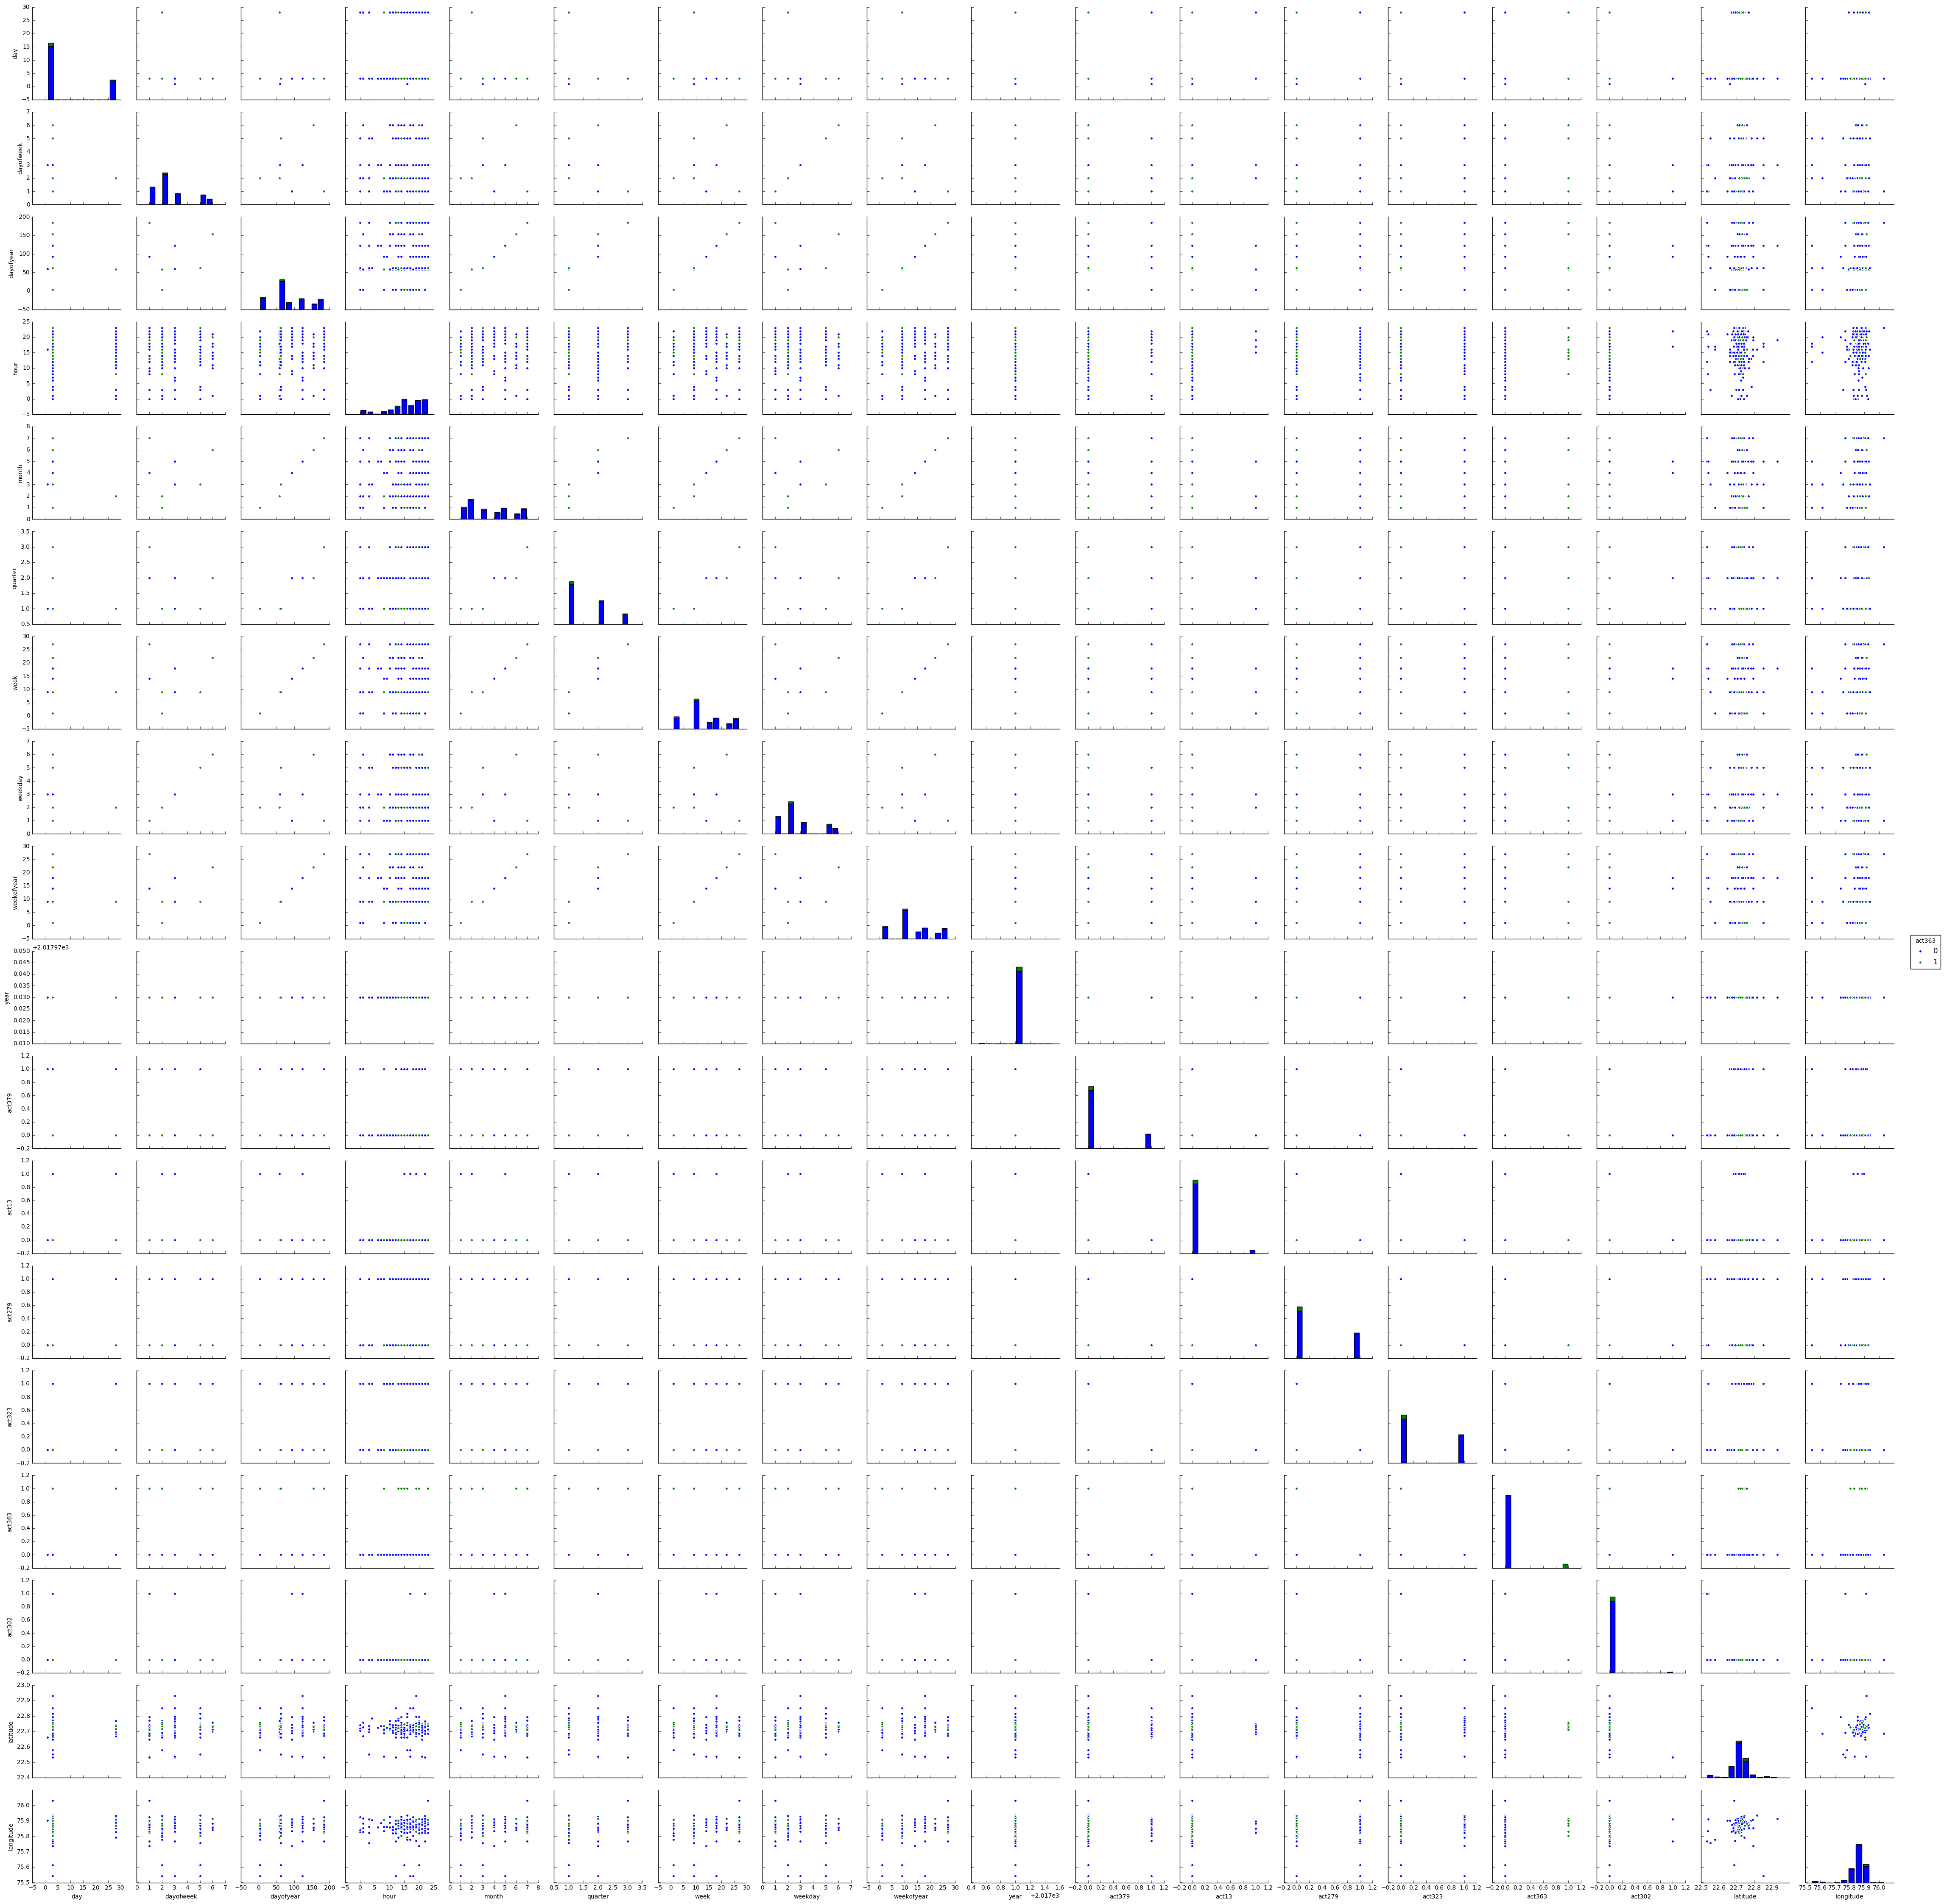

In [0]:
sns.pairplot(data1,hue='act363')

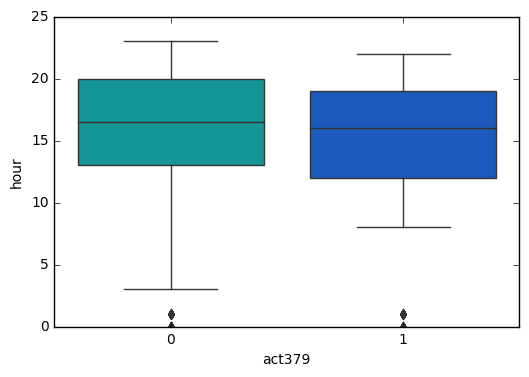

In [0]:
sns.boxplot(x='act379' ,y='hour' ,data=data1, palette='winter_r')

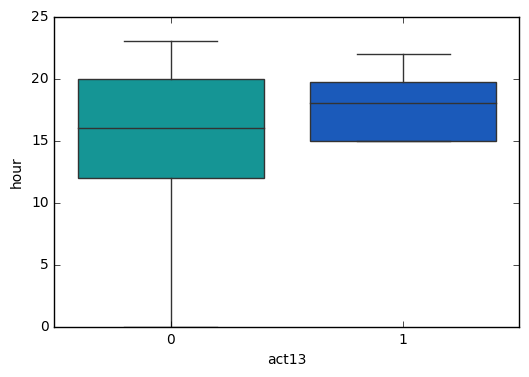

In [0]:
sns.boxplot(x='act13' ,y='hour' ,data=data1 , palette='winter_r')

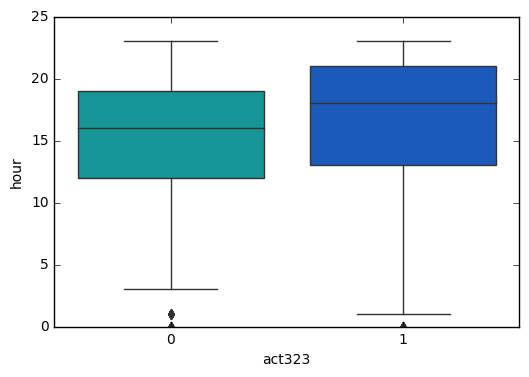

In [0]:
sns.boxplot(x='act323' ,y='hour' ,data=data1, palette='winter_r')

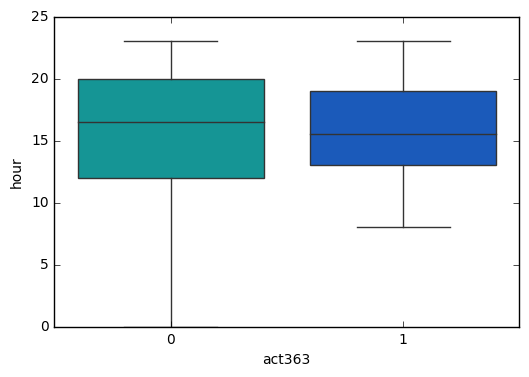

In [0]:
sns.boxplot(x='act363' ,y='hour' ,data=data1, palette='winter_r')

In [0]:
df = pd.DataFrame(data=data1, columns=['act13', 'hour', 'day'])

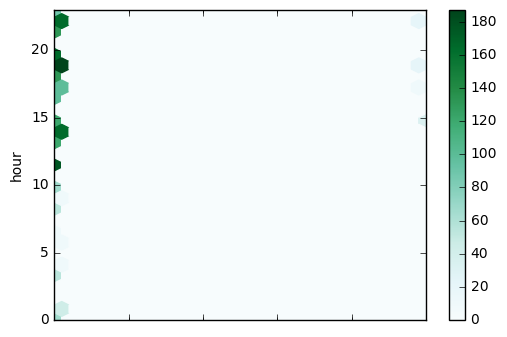

In [0]:
df.plot.hexbin(x='act13',y='hour',gridsize=25)

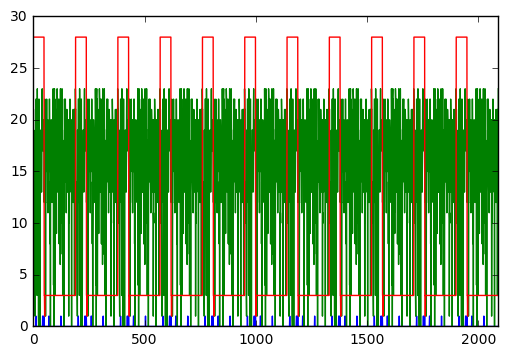

In [0]:
df.plot(legend=False)

In [0]:
df1 = pd.DataFrame(data=data1, columns=['act13', 'act323', 'act379'])

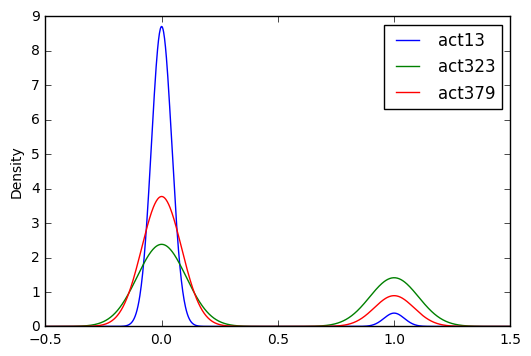

In [0]:
df1.plot.kde()


## Separating Features and Labels

In [114]:
data1.columns

Index(['year', 'month', 'day', 'hour', 'dayofyear', 'week', 'weekofyear',
       'dayofweek', 'weekday', 'quarter', 'act379', 'act13', 'act279',
       'act323', 'act363', 'act302', 'latitude', 'longitude'],
      dtype='object')

In [121]:
data1.drop(['act379', 'act13', 'act279','act323', 'act363', 'act302'],axis=1)

,year,month,day,hour,dayofyear,week,weekofyear,dayofweek,weekday,quarter,latitude,longitude
0,2018,2,28,21,59,9,9,2,2,1,22.737260,75.875987
1,2018,2,28,21,59,9,9,2,2,1,22.720992,75.876083
2,2018,2,28,10,59,9,9,2,2,1,22.736676,75.883168
3,2018,2,28,10,59,9,9,2,2,1,22.746527,75.887139
4,2018,2,28,10,59,9,9,2,2,1,22.769531,75.888772
...,...,...,...,...,...,...,...,...,...,...,...,...
2085,2018,7,3,3,184,27,27,1,1,3,22.712970,75.823580
2086,2018,7,3,21,184,27,27,1,1,3,22.693481,75.821483
2087,2018,7,3,12,184,27,27,1,1,3,22.531931,75.769126
2088,2018,7,3,10,184,27,27,1,1,3,22.719569,75.857726


In [0]:
X=data1.drop(['act379', 'act13', 'act279','act323', 'act363', 'act302'],axis=1).values


In [117]:
X

array([[2.0180000e+03, 2.0000000e+00, 2.8000000e+01, ..., 1.0000000e+00,
        2.2737260e+01, 7.5875987e+01],
       [2.0180000e+03, 2.0000000e+00, 2.8000000e+01, ..., 1.0000000e+00,
        2.2720992e+01, 7.5876083e+01],
       [2.0180000e+03, 2.0000000e+00, 2.8000000e+01, ..., 1.0000000e+00,
        2.2736676e+01, 7.5883168e+01],
       ...,
       [2.0180000e+03, 7.0000000e+00, 3.0000000e+00, ..., 3.0000000e+00,
        2.2531931e+01, 7.5769126e+01],
       [2.0180000e+03, 7.0000000e+00, 3.0000000e+00, ..., 3.0000000e+00,
        2.2719569e+01, 7.5857726e+01],
       [2.0180000e+03, 7.0000000e+00, 3.0000000e+00, ..., 3.0000000e+00,
        2.2686437e+01, 7.6032055e+01]])

In [0]:
y=data1[['act379', 'act13', 'act279','act323', 'act363', 'act302']].values

In [120]:
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]])

## Splitting the data

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=50)

In [126]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1776, 12)
(314, 12)
(1776, 6)
(314, 6)


## Creating & Training KNN Model

In [127]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

##KNN Test data accuracy score

In [128]:
knn.score(X_test,y_test)

0.964968152866242

##KNN Training data accuracy score

In [129]:
knn.score(X_train,y_train)

0.981418918918919

Since there is no much variation between training and test scores hence chances of overfitting is less.

##Hyperparameter Tuning

### Elbow Method For optimum value of K

In [0]:
error_rate = []
for i in range(1,140):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

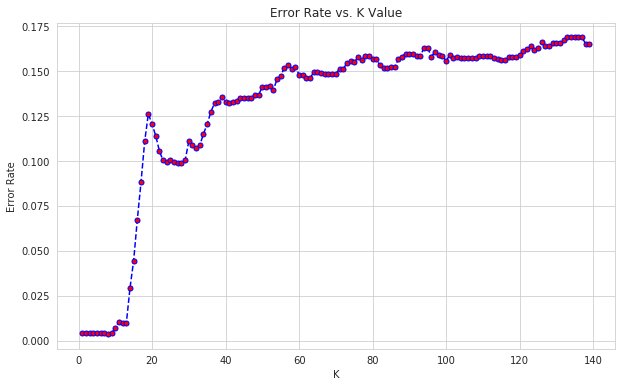

In [131]:
plt.figure(figsize=(10,6))
plt.plot(range(1,140),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Creating & Training Decision Tree Model

In [0]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=500, random_state=300)

In [133]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=500,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=300, splitter='best')

In [0]:
y_pred=dtree.predict(X_test)

## Decision Tree Training and Validation accuracy score

In [135]:
dtree.score(X_test,y_test)

0.9808917197452229

In [136]:
dtree.score(X_train,y_train)

0.9847972972972973

In [137]:
y_pred

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0]])

In [0]:
treefeatures=dtree.feature_importances_
indices = np.argsort(treefeatures)


In [148]:
indices 

array([ 0,  9,  6,  8,  1,  7,  2,  5,  4, 11, 10,  3])

In [139]:
treefeatures

array([0.        , 0.01891409, 0.02740722, 0.35182718, 0.04701415,
       0.02798758, 0.01113514, 0.02231638, 0.01130535, 0.        ,
       0.26424309, 0.2178498 ])

In [0]:
features = data1.drop(['act379', 'act13', 'act279','act323', 'act363', 'act302'],axis=1)

In [165]:
features.columns

Index(['year', 'month', 'day', 'hour', 'dayofyear', 'week', 'weekofyear',
       'dayofweek', 'weekday', 'quarter', 'latitude', 'longitude'],
      dtype='object')

In [0]:
feature_df = pd.DataFrame({"Features":features.columns,"Scores":treefeatures})

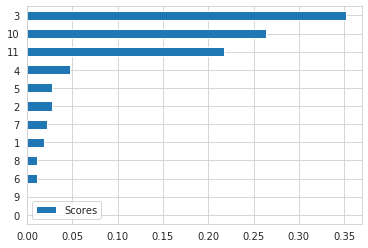

In [178]:
feature_df.sort_values(by='Scores').plot.barh()


## Tree Visualization

In [0]:

feature_names=[ 'dayofweek', 'dayofyear', 'hour', 'month', 'week','latitude', 'longitude']
labels = ['act379', 'act13', 'act279','act323', 'act363', 'act302']

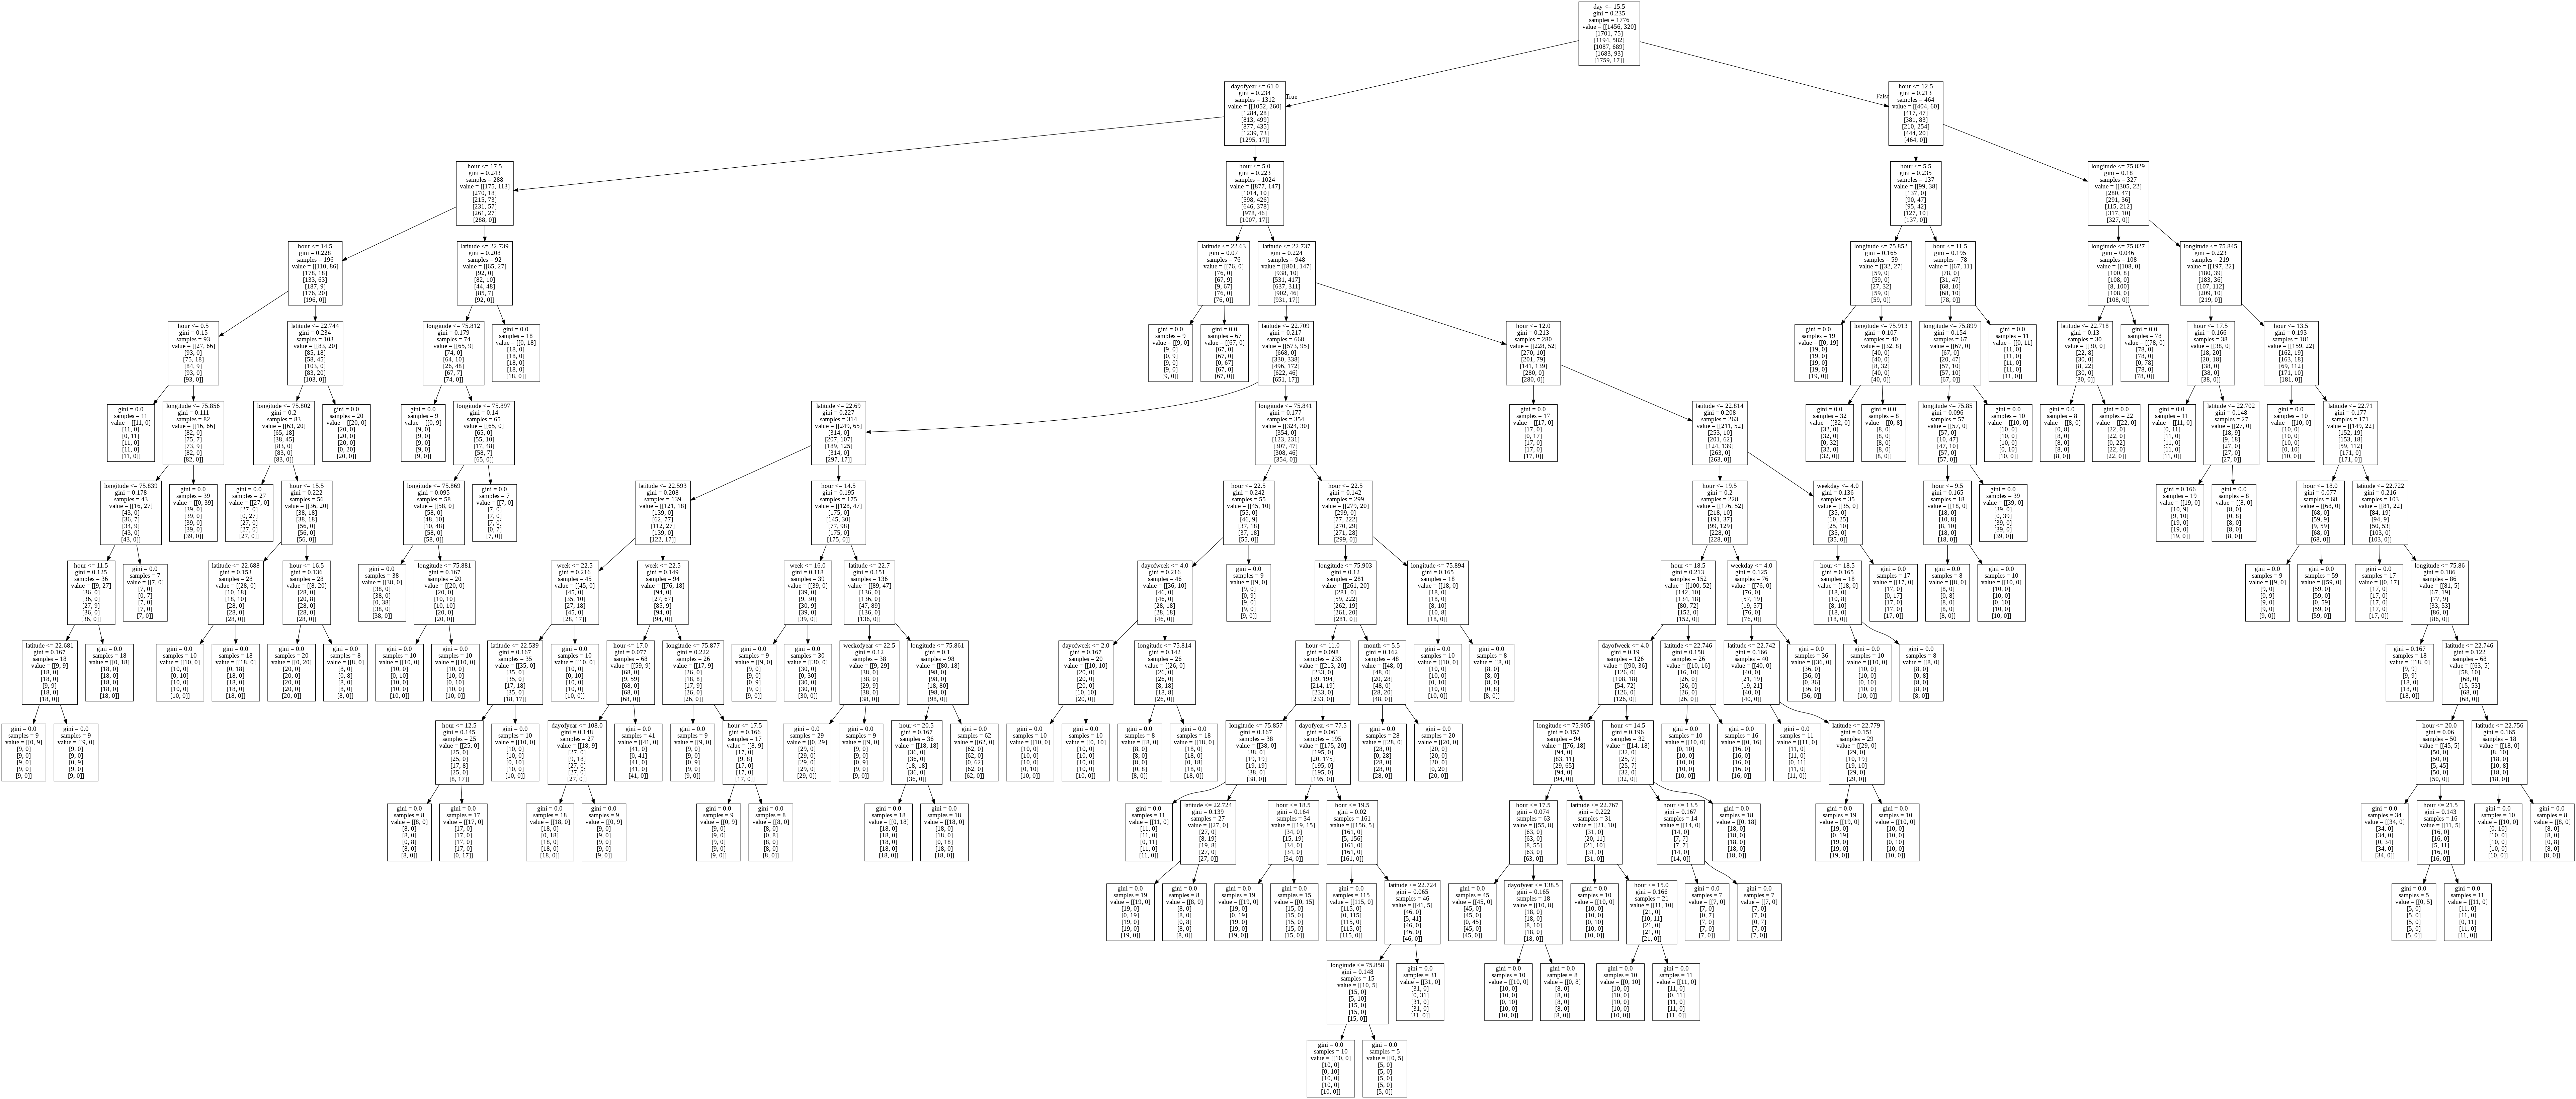

In [189]:
from IPython.display import Image  
from sklearn import tree
import pydotplus
# Create DOT data
dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names=features.columns,  
                                class_names=labels)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

##Save Decision Tree Image To File

In [190]:
graph.write_png("dtree.png")

True

## Creating & Training Random Tree Model

In [191]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred=rfc.predict(X_test)

## Training Accuracy and Test Accuracy scores for RandomForestClassifier is better as compared to other algorithms

In [193]:
rfc.score(X_test,y_test)

0.9872611464968153

In [194]:
rfc.score(X_train,y_train)

0.9898648648648649

In [0]:
om=rfc.feature_importances_
indices = np.argsort(om)


In [196]:
om

array([0.        , 0.01797258, 0.01545564, 0.31585383, 0.02269711,
       0.01662986, 0.01399398, 0.01073853, 0.01377437, 0.00537322,
       0.29079799, 0.27671287])

In [0]:
features = data1.columns

<Figure size 432x288 with 0 Axes>

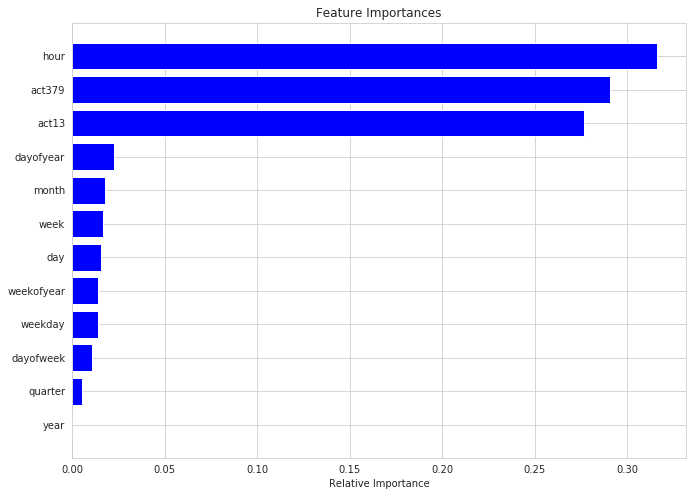

In [201]:
plt.figure(1)
plt.figure(figsize=(11,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), om[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

## Hyperparameter Tunning using RandomGridSearchCV

In [0]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = { 
    'n_estimators': [100,200, 500],
    'max_depth' : [4,5,6,7,8]
}



In [0]:
rf_random_cv = RandomizedSearchCV(rfc,param_distributions=param_grid,cv=3, n_iter=10,verbose=2,n_jobs=-1)

In [217]:
rf_random_cv.fit(X,y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   20.1s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=100,
                                                    n_jobs=None,
 

## Best Parameters

In [218]:
rf_random_cv.best_params_

{'max_depth': 8, 'n_estimators': 200}

In [219]:
rf_random_cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [223]:
rf_random_cv.best_score_

0.8569377990430622

In [220]:
rfcv = rf_random_cv.best_estimator_
rfcv.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

##Predictions

In [0]:
y_pred = rfcv.predict(X_test)

##Evaluation Metrics

In [222]:
from sklearn.metrics import accuracy_score,confusion_matrix,auc
#cm = confusion_matrix(y_pred,y_test)
print('Accuracy Score : ',accuracy_score(y_test,y_pred))

Accuracy Score :  0.7802547770700637


##LIGHTGBM

In [0]:
import lightgbm as lgb
# parameters for LightGBMClassifier - multiclass classification 
params = {'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class':6,
    'metric': 'multi_logloss',
    'learning_rate': 0.002296,
    'max_depth': 7,
    'num_leaves': 17,
    'feature_fraction': 0.4,
    'bagging_fraction': 0.6,
    'bagging_freq': 17}

In [264]:
np.where(y_train ==1)[1]

array([2, 0, 3, ..., 3, 3, 2])

In [267]:
np.unique(np.where(y_test == 1)[1])

array([0, 1, 2, 3, 4, 5])

In [0]:
 # making lgbm datasets for train and valid
d_train = lgb.Dataset(X_train, np.where(y_train ==1)[1])
d_valid = lgb.Dataset(X_test, np.where(y_test ==1)[1])

In [270]:
 bst = lgb.train(params, d_train, 5000, valid_sets=[d_valid], verbose_eval=50, early_stopping_rounds=100)

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's multi_logloss: 1.36511
[100]	valid_0's multi_logloss: 1.30267
[150]	valid_0's multi_logloss: 1.24282
[200]	valid_0's multi_logloss: 1.19249
[250]	valid_0's multi_logloss: 1.1446
[300]	valid_0's multi_logloss: 1.10302
[350]	valid_0's multi_logloss: 1.06603
[400]	valid_0's multi_logloss: 1.0317
[450]	valid_0's multi_logloss: 0.997496
[500]	valid_0's multi_logloss: 0.966858
[550]	valid_0's multi_logloss: 0.938954
[600]	valid_0's multi_logloss: 0.909136
[650]	valid_0's multi_logloss: 0.882055
[700]	valid_0's multi_logloss: 0.859479
[750]	valid_0's multi_logloss: 0.838414
[800]	valid_0's multi_logloss: 0.816151
[850]	valid_0's multi_logloss: 0.793972
[900]	valid_0's multi_logloss: 0.773441
[950]	valid_0's multi_logloss: 0.754179
[1000]	valid_0's multi_logloss: 0.73383
[1050]	valid_0's multi_logloss: 0.716592
[1100]	valid_0's multi_logloss: 0.698465
[1150]	valid_0's multi_logloss: 0.681242
[1200]	valid_0's multi_lo

In [0]:
lgbm_pred = bst.predict(X_test)

In [272]:
lgbm_pred[:-5,]

array([[5.68594864e-03, 2.24738753e-04, 9.12840859e-01, 7.99274999e-02,
        1.16279334e-03, 1.58160341e-04],
       [5.33308108e-02, 4.80078129e-01, 3.77564822e-01, 8.85671141e-02,
        4.35262256e-04, 2.38616107e-05],
       [9.35148951e-03, 3.34789335e-04, 8.10911050e-03, 9.82047090e-01,
        1.51369213e-04, 6.15136766e-06],
       ...,
       [2.14263729e-02, 5.65319026e-05, 2.74798909e-02, 9.48385855e-01,
        2.63892076e-03, 1.24281948e-05],
       [7.07113063e-03, 4.98499127e-03, 9.33606434e-01, 4.42977980e-02,
        1.00202145e-02, 1.94320555e-05],
       [2.02897197e-02, 7.74670182e-04, 2.22273317e-02, 9.03397765e-01,
        5.32825468e-02, 2.79661843e-05]])

In [0]:
predictions = []

for x in lgbm_pred :
    predictions.append(np.argmax(x))

In [278]:
len(predictions)

314

In [0]:
test = np.where(y_test == 1)[1]

##CONFUSION MATRIX

In [0]:
cm = confusion_matrix(test,predictions)

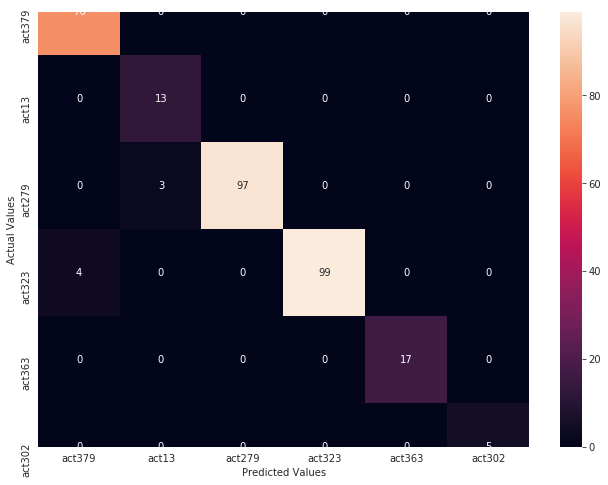

In [287]:
plt.figure(figsize=(11,8))
sns.heatmap(cm,xticklabels=['act379', 'act13', 'act279','act323', 'act363', 'act302'],yticklabels=['act379', 'act13', 'act279','act323', 'act363', 'act302'],annot=True,fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

##ACCURACY SCORE

In [289]:
print(accuracy_score(test,predictions))

0.9777070063694268
